In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('car_prediction_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df1=df.Car_Name.copy()

In [5]:
df1

0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df['Age_of_car']=2022-df['Year']

In [8]:
df.drop(['Year','Car_Name'], inplace=True, axis=1)

In [9]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age_of_car       0
dtype: int64

In [10]:
df.select_dtypes(['object']).astype('str')

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [11]:
df=pd.get_dummies(df, drop_first=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [13]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [14]:
#sns.pairplot(df)

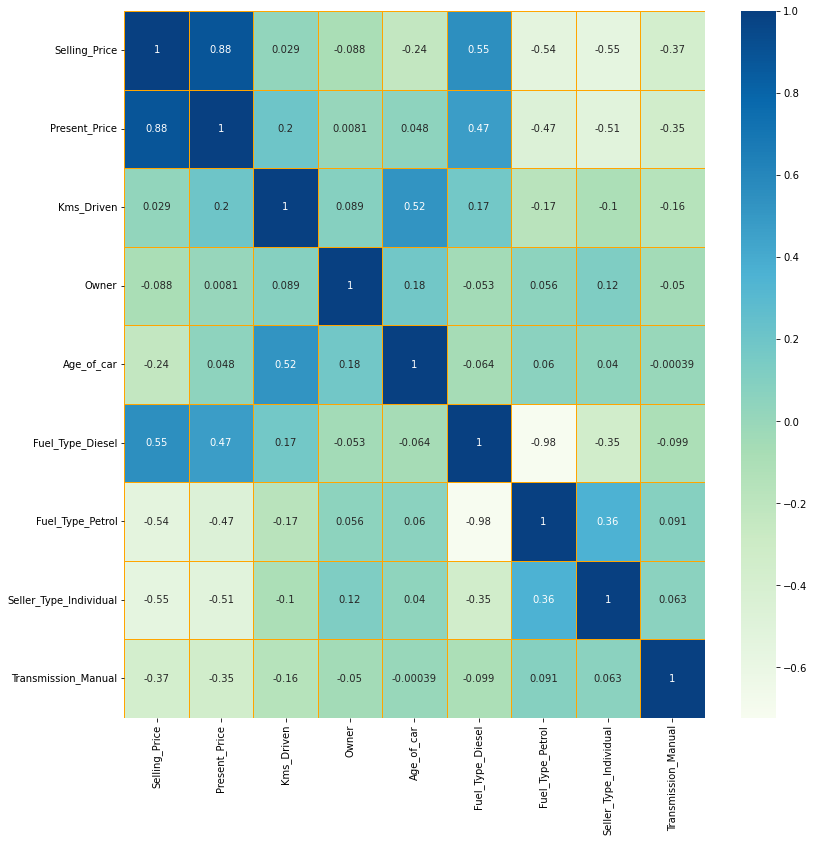

In [15]:
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(),robust=True,fmt='.2g',linewidths=1,linecolor = 'orange', annot=True, cmap='GnBu'); #heat map

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


## Splitting Data

In [17]:
X=df.iloc[:,1:]

In [18]:
y=df.iloc[:,0]

### Feature Importance

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [20]:
f_importance=pd.Series(model.feature_importances_, index=X.columns)

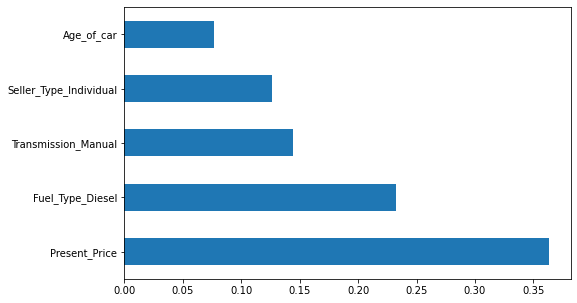

In [21]:
plt.figure(figsize = (8,5))
f_importance.nlargest(5).plot(kind='barh');
plt.show()

# Machile Learning

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## KNeighborsRegressor

In [23]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [24]:
knn_model.predict(X_test)[0:5]

array([1.532, 5.45 , 3.57 , 3.286, 7.48 ])

In [25]:
y_pred=knn_model.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.416118793884942

## Model Tuning

In [27]:
RMSE=[]
for k in range(10):
    k=k+1
    knn_model = KNeighborsRegressor().fit(X_train, y_train)
    y_pred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print('k=', k, 'for RMSE value:', rmse)
    

k= 1 for RMSE value: 5.416118793884942
k= 2 for RMSE value: 5.416118793884942
k= 3 for RMSE value: 5.416118793884942
k= 4 for RMSE value: 5.416118793884942
k= 5 for RMSE value: 5.416118793884942
k= 6 for RMSE value: 5.416118793884942
k= 7 for RMSE value: 5.416118793884942
k= 8 for RMSE value: 5.416118793884942
k= 9 for RMSE value: 5.416118793884942
k= 10 for RMSE value: 5.416118793884942


## GridSearchCV

In [28]:
knn_params={"n_neighbors": np.arange(1,30,1)}

In [29]:
knn = KNeighborsRegressor()

In [30]:
knn_cv_model=GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [31]:
knn_cv_model.best_params_

{'n_neighbors': 28}

In [32]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [33]:
y_pred=knn_tuned.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.1347582588811544

In [35]:
#Compare Actual and Predicted
df2 = pd. DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [36]:
df2.head(5)

,Actual,Predicted
177,0.35,4.388929
289,10.11,4.974643
228,4.95,4.298929
198,0.15,4.307857
60,6.95,6.136786


In [37]:

df_n=pd.read_csv('car_prediction_data.csv')

In [38]:
df_n.iloc[[177,289,228,198,60]]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,Honda Activa 125,2016,0.35,0.57,24000,Petrol,Individual,Automatic,0
289,city,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
228,verna,2012,4.95,9.40,60000,Diesel,Dealer,Manual,0
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
60,corolla altis,2013,6.95,18.61,40001,Petrol,Dealer,Manual,0


## Support Vector Regression

In [39]:
svr_model = SVR().fit(X_train, y_train)

In [40]:
svr_model.predict(X_train)[0:5]

array([1.80036948, 2.42704299, 3.9497199 , 3.12443367, 2.55318441])

In [41]:
svr_model.predict(X_test)[0:5]

array([3.28623627, 2.27218625, 4.35894416, 3.94971958, 4.15617913])

In [42]:
svr_model.intercept_

array([2.02921243])

In [44]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5.382750977399513

## model tunning

In [45]:
svr_params = {"C": [0.1,0.5,1,3]}

In [46]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train, y_train)

In [47]:
svr_cv_model.best_params_

{'C': 0.1}

In [48]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [49]:
svr_tuned = SVR( C = 0.5).fit(X_train, y_train)

In [94]:
y_pred = svr_tuned.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.379524582611648

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

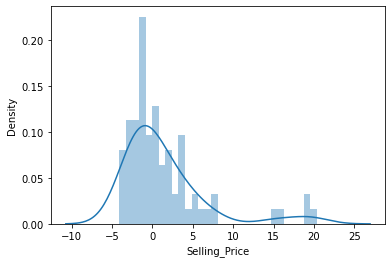

In [96]:
sns.distplot(y_test-y_pred, bins=30)

# neural_network.MLPRegressor

In [52]:
scaler = StandardScaler()

In [53]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [55]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [56]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
mlp_model.predict(X_test_scaled)[0:5]

array([-0.17643084,  9.73520697,  4.40865082,  0.82326998,  8.43874261])

In [59]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.9870888056250767

## Model Tuning

In [63]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}

In [64]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [66]:
#final
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9540504861413

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

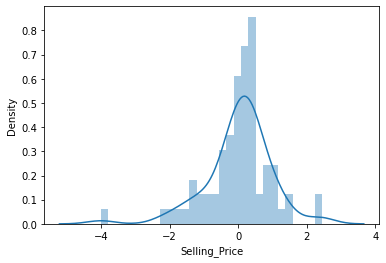

In [74]:
sns.distplot(y_test-y_pred, bins=30)

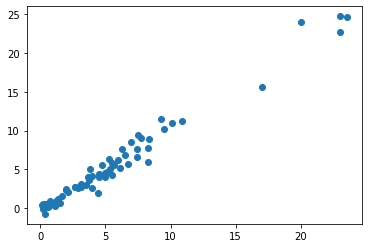

In [75]:
plt.scatter(y_test,y_pred)

# DecisionTreeRegressor

In [77]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [78]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [80]:
cart_model.predict(X_test)[0:5]

array([ 0.62428571, 10.59882353,  4.19186047,  0.62428571,  5.73545455])

In [81]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.5544761112239696

## Model Tuning

In [82]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_leaf_nodes=10)
File:        c:\anaconda\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        Poisson devian

In [83]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [85]:
cart_cv_model=GridSearchCV(cart_model,cart_params, cv=10).fit(X_train,y_train)

In [86]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 5}

In [88]:
cart_tuned = DecisionTreeRegressor(max_depth= 4, min_samples_split= 5).fit(X_train,y_train)

In [89]:
y_pred=cart_tuned.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.3663348790090106

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

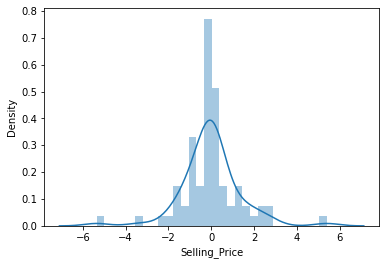

In [92]:
sns.distplot(y_test-y_pred, bins=30)

# Random Forests

In [97]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [98]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.9128318282021871

## Model Tuning

In [102]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000],
            "min_samples_split": [2,10,80]}

In [103]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.77849321 0.78380381 0.78410686 0.75084663 0.75318687 0.75373107
 0.486862   0.49022287 0.4902231  0.83222684 0.83611241 0.83508783
 0.79472707 0.79693006 0.79819133 0.61659999 0.61684373 0.61757793
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.80495645 0.80561086 0.80810099
 0.76574049 0.76537961 0.76825495 0.486862   0.49022287 0.4902231
 0.84411565 0.84789705 0.84585285 0.80586684 0.80327435 0.80361591
 0.61659999 0.61684373 0.61757793        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.80994319 0.81131474 0.81411512 0.7703222  0.76892786 0.76958389
 0.486862   0.49022287 0.4902231  0.84507277 0.84567255 0.84906188
 0.80366781 0.80364169 0.80411038 0.61659999 0.61684373 0.61757793
        nan        nan        nan        nan        nan        nan


In [104]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [105]:
rf_model = RandomForestRegressor(random_state = 42, 
                                 max_depth = 10,
                                max_features = 5,
                                min_samples_split = 2,
                                 n_estimators = 1000)
rf_tuned = rf_model.fit(X_train, y_train)

In [106]:
rf_tuned

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=1000,
                      random_state=42)

In [108]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.8758817971749301

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

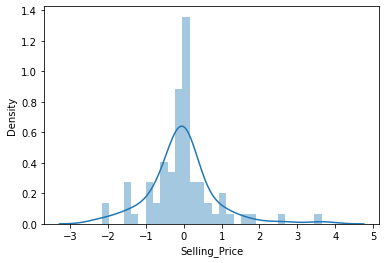

In [109]:
sns.distplot(y_test-y_pred, bins=30)

## feature_importances

In [110]:
rf_tuned.feature_importances_*100

array([66.2936371 ,  5.19749892,  0.08193699,  6.1086785 ,  7.03491294,
        2.67080367,  9.32872222,  3.28380967])

In [111]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)

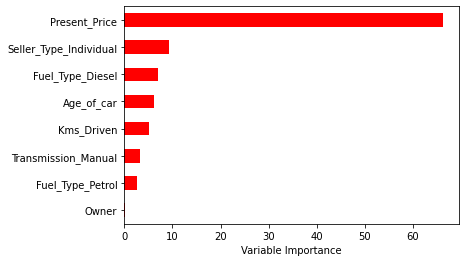

In [112]:
Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines

In [113]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [116]:
?gbm_model 

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    Loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

learning_rate : float, default=0.1
    Learning rate shrinks the contribution of each tree by

In [114]:
y_pred = gbm_model.predict(X_test)

In [115]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9315367625187947

## Model Tuning

In [119]:
gbm_params = {"learning_rate": [0.001,0.1],
             "max_depth": [3,5,],
             "n_estimators": [100,200],
             "subsample": [1,0.5],
             "loss": ["ls","lad"]}

In [120]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 2, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


In [121]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.5}

In [122]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "ls",
                                     max_depth = 3,
                                     n_estimators = 200,
                                     subsample = 0.5).fit(X_train, y_train)

In [123]:
y_pred = gbm_tuned.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.8099672138565303

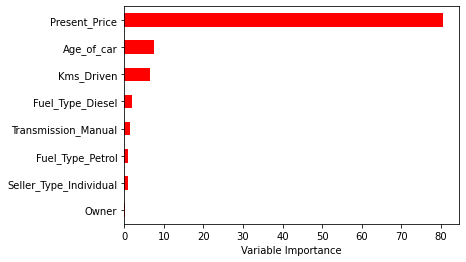

In [125]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [126]:
!pip install xgboost

In [ ]:
import xgboost

In [127]:
from xgboost import XGBRegressor

In [129]:
xgb=XGBRegressor().fit(X_train,y_train)

In [130]:
?xgb

Type:        XGBRegressor
String form:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
           colsample_bylevel=1,  <...> m_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
           reg_lambda=1, ...)
File:        c:\anaconda\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning

In [131]:
y_pred=xgb.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9459309453545545

# Model TUNNIng

In [133]:
xgb_params = {"learning_rate": [0.1,0.5],
             "max_depth": [2,3,4],
             "n_estimators": [100,200],
             "colsample_bytree": [0.4,1]}

In [134]:
xgn_cv_model=GridSearchCV(xgb, xgb_params, cv= 3, n_jobs= -1, verbose= 2).fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [136]:
xgn_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 200}

In [137]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 200).fit(X_train, y_train)

In [138]:
y_pred = xgb_tuned.predict(X_test)

In [139]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.0657849550231857

# LightGBM

In [141]:
from lightgbm import LGBMRegressor

In [142]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [143]:
y_pred = lgb_model.predict(X_test)

In [144]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.616002580009081

## Model Tuning 

In [145]:
lgbm_params = {"learning_rate": [ 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200],
              "max_depth": [1,2,3,4,5]}

In [147]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 3, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [148]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}

In [149]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 2, 
                          n_estimators = 100).fit(X_train, y_train)

In [150]:
y_pred = lgbm_tuned.predict(X_test)

In [151]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.4572628144132564

# AUTOMATING MACHINE LEARNING TASKS

In [153]:
def compML(df, alg):
    #train-test ayrimi
    y=df.iloc[:,0]
    X=df.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "mean_squared_error:",RMSE)

## Default Parameter

In [161]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [162]:
for i in models:
    compML(df, i)

LGBMRegressor mean_squared_error: 1.616002580009081
XGBRegressor mean_squared_error: 0.9459309453545545
GradientBoostingRegressor mean_squared_error: 0.9439227608548781
RandomForestRegressor mean_squared_error: 0.9267481346793093
DecisionTreeRegressor mean_squared_error: 1.3982667842725864
MLPRegressor mean_squared_error: 130.33806948547118
KNeighborsRegressor mean_squared_error: 5.416118793884942
SVR mean_squared_error: 5.382750977399513


## Tunned Score

In [251]:
def compML1(df, alg):
    #train-test ayrimi
    y=df.iloc[:,0]
    X=df.iloc[:,1:]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = str(alg).split(' ')[0]
    print(model_name, "mean_squared_error:",RMSE) 

In [252]:
models = [LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 2, 
                          n_estimators = 100), 
          
          XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         n_estimators = 200), 
          GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "ls",
                                     max_depth = 3,
                                     n_estimators = 200,
                                     subsample = 0.5), 
          RandomForestRegressor(random_state = 42, 
                                 max_depth = 10,
                                max_features = 5,
                                min_samples_split = 2,
                                 n_estimators = 1000), 
          DecisionTreeRegressor(max_depth= 4,
                                min_samples_split= 5),
          MLPRegressor(alpha = 0.1, 
                       hidden_layer_sizes = (100,100)),
          KNeighborsRegressor(n_neighbors=28), 
          SVR( C = 0.5)]

In [253]:
for i in models:
    compML1(df, i)

LGBMRegressor(max_depth=2) mean_squared_error: 1.4572628144132564
XGBRegressor(base_score=0.5, mean_squared_error: 1.0657849550231857
GradientBoostingRegressor(n_estimators=200, mean_squared_error: 0.7327746276755932
RandomForestRegressor(max_depth=10, mean_squared_error: 0.8758817971749301
DecisionTreeRegressor(max_depth=4, mean_squared_error: 1.3663348790090104
MLPRegressor(alpha=0.1, mean_squared_error: 94.54509829888019
KNeighborsRegressor(n_neighbors=28) mean_squared_error: 5.1347582588811544
SVR(C=0.5) mean_squared_error: 5.379524582611648
